In [32]:
import pandas as pd
from scipy.stats import boxcox
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [33]:
data = pd.read_csv(r"C:\Users\GS0864\OneDrive\Desktop\for_vs_code\CAR_PRICE_PREDICTION\EDA\Final_data.csv", index_col=0)

In [34]:
data.isnull().sum()

body type              0
Kilometers driven      0
Transmission type      0
Number of owners       0
car model              0
Year of manufacture    0
price                  0
Fuel Type              0
Insurance Validity     0
Seats                  0
Engine                 0
Mileage                0
Color                  0
Turbo Charger          0
Super Charger          0
Steering Type          0
Top Speed              0
No of Doors            0
Cargo Volumn           0
City                   0
dtype: int64

In [35]:
data.shape

(8261, 20)

In [36]:
data['Top Speed'] = data['Top Speed'].astype(int)

In [37]:
data['Seats'] = data['Seats'].astype(int)

In [38]:
data.head()

,body type,Kilometers driven,Transmission type,Number of owners,car model,Year of manufacture,price,Fuel Type,Insurance Validity,Seats,Engine,Mileage,Color,Turbo Charger,Super Charger,Steering Type,Top Speed,No of Doors,Cargo Volumn,City
0,Hatchback,120000,Manual,3,Maruti Celerio,2015,400000.0,Petrol,Third Party insurance,5,998.0,23.10,White,No,No,Power,150,5,235,Banglore
1,SUV,32706,Manual,2,Ford Ecosport,2018,811000.0,Petrol,Comprehensive,5,1497.0,17.00,White,No,No,Power,170,4,352,Banglore
2,Hatchback,11949,Manual,1,Tata Tiago,2018,585000.0,Petrol,Comprehensive,5,1199.0,23.84,Red,No,No,Power,150,5,242,Banglore
3,Sedan,17794,Manual,1,Hyundai Xcent,2014,462000.0,Petrol,Comprehensive,5,1197.0,19.10,Others,No,No,Power,172,4,407,Banglore
4,SUV,60000,Manual,1,Maruti SX4 S Cross,2015,790000.0,Diesel,Third Party insurance,5,1248.0,23.65,Gray,Yes,No,Power,190,5,353,Banglore


In [39]:
# Outliers Control
data['Cargo Volumn'].max()

np.int64(3851405)

In [40]:
# Boxcox method
value, _ = boxcox(data['Cargo Volumn'])

In [41]:
data['Cargo Volumn'] = value

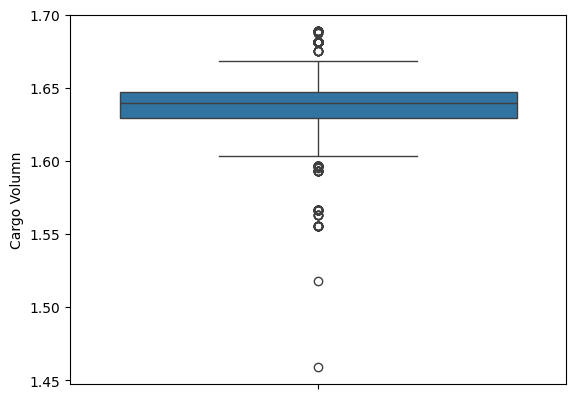

In [42]:
sns.boxplot(data=data['Cargo Volumn'])
plt.show()

In [43]:
# sqrt method

np.sqrt(data['Cargo Volumn'])

0       1.273686
1       1.279239
2       1.274136
3       1.280927
4       1.279274
          ...   
8364    1.277762
8365    1.268897
8366    1.282569
8367    1.273751
8368    1.281009
Name: Cargo Volumn, Length: 8261, dtype: float64

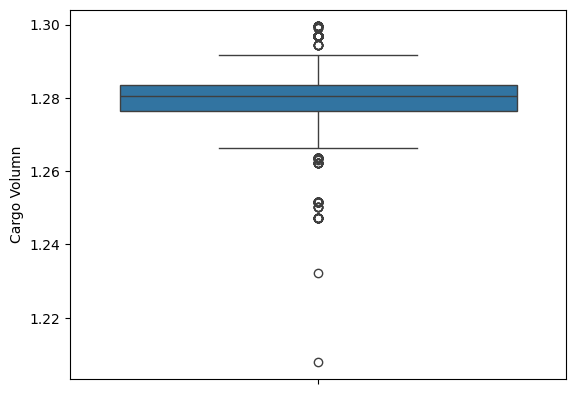

In [44]:
sns.boxplot(data=np.sqrt(data['Cargo Volumn']))
plt.show()

In [45]:
# log2 method
np.log2(data['Cargo Volumn'])

0       0.698019
1       0.710572
2       0.699039
3       0.714377
4       0.710650
          ...   
8364    0.707239
8365    0.687150
8366    0.718072
8367    0.698168
8368    0.714560
Name: Cargo Volumn, Length: 8261, dtype: float64

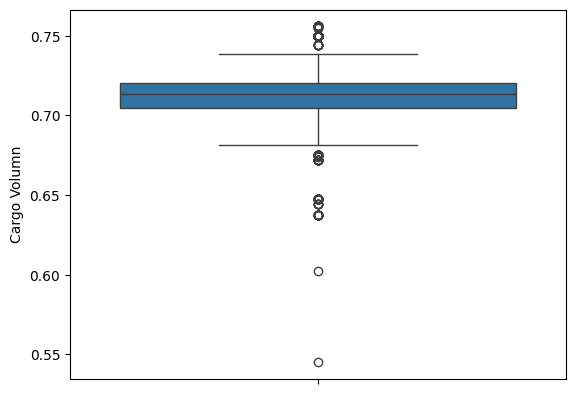

In [46]:
sns.boxplot(data=np.log2(data['Cargo Volumn']))
plt.show()

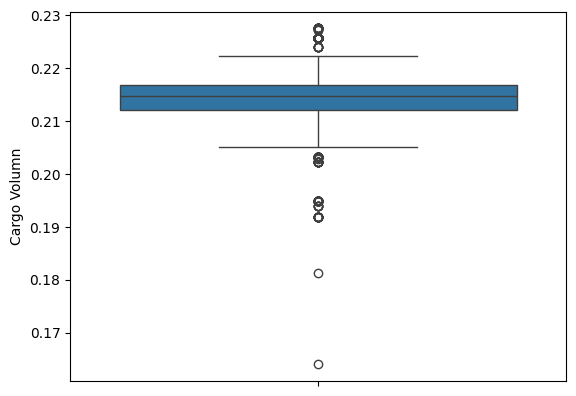

In [47]:
# log10 method

sns.boxplot(data=np.log10(data['Cargo Volumn']))
plt.show()

In [48]:
data['Inverse_transform'] = data['Cargo Volumn'].apply(lambda x: 1/x)

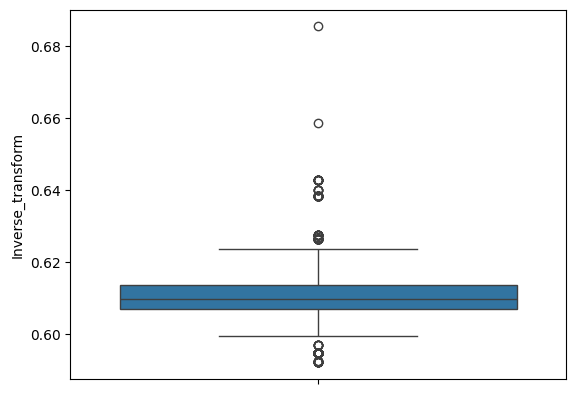

In [49]:
sns.boxplot(data=data['Inverse_transform'])
plt.show()

In [50]:
data.head()

,body type,Kilometers driven,Transmission type,Number of owners,car model,Year of manufacture,price,Fuel Type,Insurance Validity,Seats,...,Mileage,Color,Turbo Charger,Super Charger,Steering Type,Top Speed,No of Doors,Cargo Volumn,City,Inverse_transform
0,Hatchback,120000,Manual,3,Maruti Celerio,2015,400000.0,Petrol,Third Party insurance,5,...,23.10,White,No,No,Power,150,5,1.622275,Banglore,0.616418
1,SUV,32706,Manual,2,Ford Ecosport,2018,811000.0,Petrol,Comprehensive,5,...,17.00,White,No,No,Power,170,4,1.636453,Banglore,0.611078
2,Hatchback,11949,Manual,1,Tata Tiago,2018,585000.0,Petrol,Comprehensive,5,...,23.84,Red,No,No,Power,150,5,1.623424,Banglore,0.615982
3,Sedan,17794,Manual,1,Hyundai Xcent,2014,462000.0,Petrol,Comprehensive,5,...,19.10,Others,No,No,Power,172,4,1.640774,Banglore,0.609468
4,SUV,60000,Manual,1,Maruti SX4 S Cross,2015,790000.0,Diesel,Third Party insurance,5,...,23.65,Gray,Yes,No,Power,190,5,1.636541,Banglore,0.611045


In [51]:
# droping the columns outliers
# "Cargo Volumn", "Inverse_transform"

In [52]:
data.drop(['Cargo Volumn', 'Inverse_transform'], axis=1, inplace=True)

In [53]:
data

,body type,Kilometers driven,Transmission type,Number of owners,car model,Year of manufacture,price,Fuel Type,Insurance Validity,Seats,Engine,Mileage,Color,Turbo Charger,Super Charger,Steering Type,Top Speed,No of Doors,City
0,Hatchback,120000,Manual,3,Maruti Celerio,2015,400000.0,Petrol,Third Party insurance,5,998.0,23.10,White,No,No,Power,150,5,Banglore
1,SUV,32706,Manual,2,Ford Ecosport,2018,811000.0,Petrol,Comprehensive,5,1497.0,17.00,White,No,No,Power,170,4,Banglore
2,Hatchback,11949,Manual,1,Tata Tiago,2018,585000.0,Petrol,Comprehensive,5,1199.0,23.84,Red,No,No,Power,150,5,Banglore
3,Sedan,17794,Manual,1,Hyundai Xcent,2014,462000.0,Petrol,Comprehensive,5,1197.0,19.10,Others,No,No,Power,172,4,Banglore
4,SUV,60000,Manual,1,Maruti SX4 S Cross,2015,790000.0,Diesel,Third Party insurance,5,1248.0,23.65,Gray,Yes,No,Power,190,5,Banglore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Hatchback,10000,Manual,1,Maruti Celerio,2022,510000.0,Petrol,Third Party insurance,5,998.0,25.24,Others,No,No,Electric,170,5,Kolkata
8365,Hatchback,120000,Manual,1,Maruti Alto 800,2014,180000.0,Petrol,Third Party insurance,5,796.0,22.74,Others,No,No,Power,140,5,Kolkata
8366,Sedan,50000,Automatic,3,Mercedes-Benz C-Class,2011,550000.0,Petrol,Third Party insurance,5,1796.0,11.74,Others,No,No,Power,230,4,Kolkata
8367,Hatchback,40000,Manual,1,Maruti Ritz,2012,140000.0,Petrol,Third Party insurance,5,1197.0,18.50,Others,No,No,Power,156,5,Kolkata


In [54]:
# Encoding the Categorical data or columns

In [55]:
data.select_dtypes(include='object')

,body type,Transmission type,car model,Fuel Type,Insurance Validity,Color,Turbo Charger,Super Charger,Steering Type,City
0,Hatchback,Manual,Maruti Celerio,Petrol,Third Party insurance,White,No,No,Power,Banglore
1,SUV,Manual,Ford Ecosport,Petrol,Comprehensive,White,No,No,Power,Banglore
2,Hatchback,Manual,Tata Tiago,Petrol,Comprehensive,Red,No,No,Power,Banglore
3,Sedan,Manual,Hyundai Xcent,Petrol,Comprehensive,Others,No,No,Power,Banglore
4,SUV,Manual,Maruti SX4 S Cross,Diesel,Third Party insurance,Gray,Yes,No,Power,Banglore
...,...,...,...,...,...,...,...,...,...,...
8364,Hatchback,Manual,Maruti Celerio,Petrol,Third Party insurance,Others,No,No,Electric,Kolkata
8365,Hatchback,Manual,Maruti Alto 800,Petrol,Third Party insurance,Others,No,No,Power,Kolkata
8366,Sedan,Automatic,Mercedes-Benz C-Class,Petrol,Third Party insurance,Others,No,No,Power,Kolkata
8367,Hatchback,Manual,Maruti Ritz,Petrol,Third Party insurance,Others,No,No,Power,Kolkata


In [56]:
le = LabelEncoder()
for i in data.select_dtypes(include='object'):
    data[i] = le.fit_transform(data[i])

In [57]:
data

,body type,Kilometers driven,Transmission type,Number of owners,car model,Year of manufacture,price,Fuel Type,Insurance Validity,Seats,Engine,Mileage,Color,Turbo Charger,Super Charger,Steering Type,Top Speed,No of Doors,City
0,2,120000,1,3,160,2015,400000.0,4,5,5,998.0,23.10,138,0,0,4,150,5,0
1,7,32706,1,2,50,2018,811000.0,4,0,5,1497.0,17.00,138,0,0,4,170,4,0
2,2,11949,1,1,273,2018,585000.0,4,0,5,1199.0,23.84,110,0,0,4,150,5,0
3,8,17794,1,1,87,2014,462000.0,4,0,5,1197.0,19.10,86,0,0,4,172,4,0
4,7,60000,1,1,178,2015,790000.0,1,5,5,1248.0,23.65,55,3,0,4,190,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,2,10000,1,1,160,2022,510000.0,4,5,5,998.0,25.24,86,0,0,1,170,5,5
8365,2,120000,1,1,155,2014,180000.0,4,5,5,796.0,22.74,86,0,0,4,140,5,5
8366,8,50000,0,3,197,2011,550000.0,4,5,5,1796.0,11.74,86,0,0,4,230,4,5
8367,2,40000,1,1,175,2012,140000.0,4,5,5,1197.0,18.50,86,0,0,4,156,5,5


In [58]:
data_corr = data.corr()

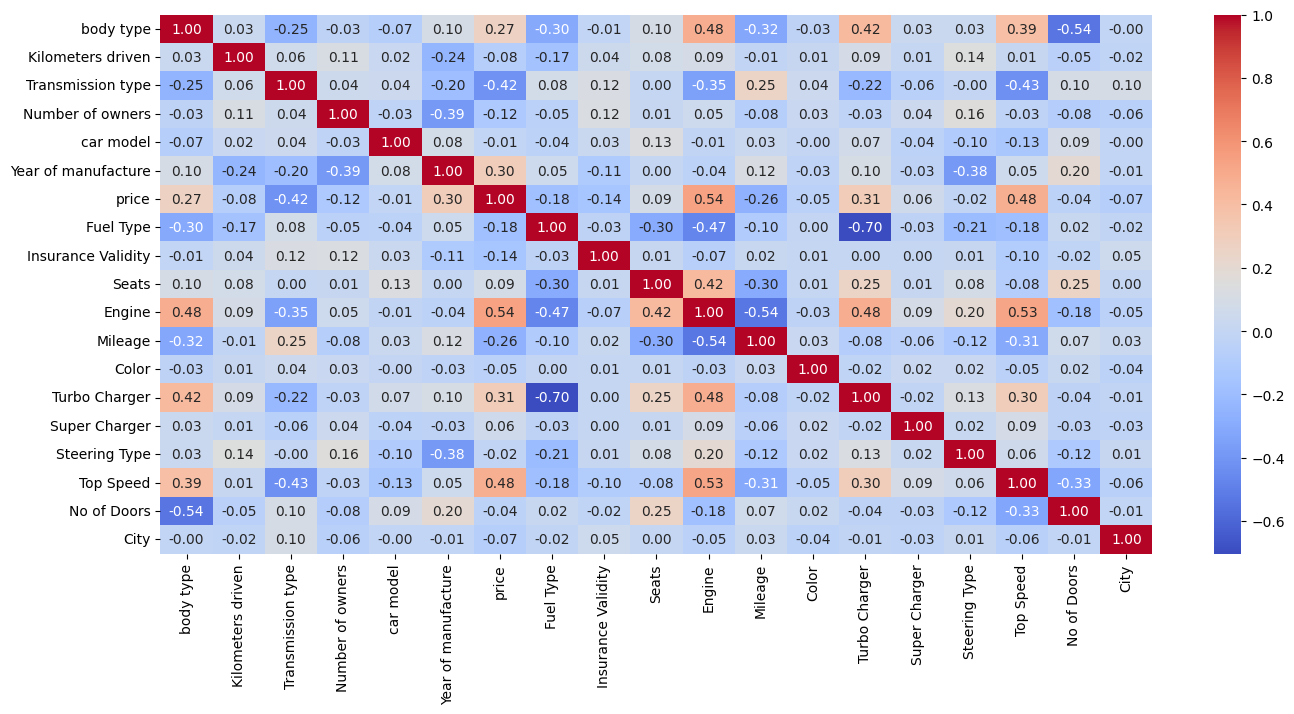

In [59]:
plt.figure(figsize=(16,7))
sns.heatmap(data=data_corr,fmt=".2f", annot=True, cmap="coolwarm")
plt.show()

<Axes: xlabel='price', ylabel='Count'>

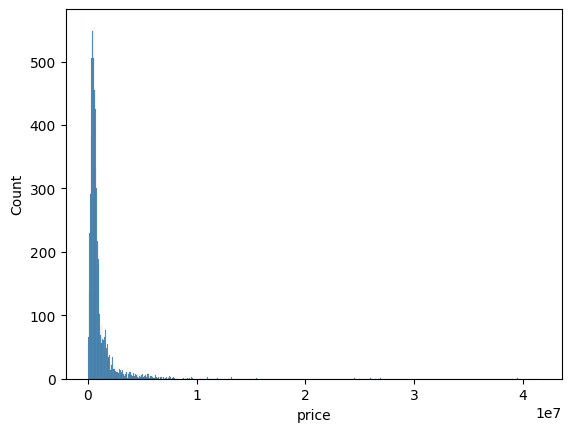

In [60]:
sns.histplot(data=data, x='price')

In [61]:
data.to_csv(r"encoding.csv")

In [62]:
data

,body type,Kilometers driven,Transmission type,Number of owners,car model,Year of manufacture,price,Fuel Type,Insurance Validity,Seats,Engine,Mileage,Color,Turbo Charger,Super Charger,Steering Type,Top Speed,No of Doors,City
0,2,120000,1,3,160,2015,400000.0,4,5,5,998.0,23.10,138,0,0,4,150,5,0
1,7,32706,1,2,50,2018,811000.0,4,0,5,1497.0,17.00,138,0,0,4,170,4,0
2,2,11949,1,1,273,2018,585000.0,4,0,5,1199.0,23.84,110,0,0,4,150,5,0
3,8,17794,1,1,87,2014,462000.0,4,0,5,1197.0,19.10,86,0,0,4,172,4,0
4,7,60000,1,1,178,2015,790000.0,1,5,5,1248.0,23.65,55,3,0,4,190,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,2,10000,1,1,160,2022,510000.0,4,5,5,998.0,25.24,86,0,0,1,170,5,5
8365,2,120000,1,1,155,2014,180000.0,4,5,5,796.0,22.74,86,0,0,4,140,5,5
8366,8,50000,0,3,197,2011,550000.0,4,5,5,1796.0,11.74,86,0,0,4,230,4,5
8367,2,40000,1,1,175,2012,140000.0,4,5,5,1197.0,18.50,86,0,0,4,156,5,5
